# Project: Classification model to predict 10-year risk of future Coronary Heart Disease (CHD)

## About the dataset:
- The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.
- The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,240 records and 15 attributes.

## Problem Statement
- Cardiovascular Disease, among other chronic diseases, is one of the leading causes of death and disability in the United States contributing significantly to the nation’s $3.8 trillion annual health care costs.The early prognosis of CVD can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.
- Such risk assessment can give healthcare providers insight into which individuals might benefit from enhanced services or wellness activities.

## Step 1: Importing Libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np

In [3]:
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Step 2: Reading Dataset

In [4]:
# Reading and converting the data into a pandas dataframe
df = pd.read_csv(r"framingham.csv")

In [5]:
# Let's see the dimensions of the dataframe
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
# Let's check the dimensions of the dataframe
df.shape

(4240, 16)

In [7]:
# Let's look at the statistical aspects of the dataframe
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
# Let's see the type of each column
# This shows an overview of the Columns, non-null count and the data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


## Source:
- The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.
- The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

## Attributes:
### Demographic:
1. Male: Male (1) or Female (0)
2.   Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
3. Education: no further information provided

### Behavioral:
1. Current Smoker: whether or not the patient is a current smoker (Nominal)
2. Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

### Information on medical history:
1. BP Meds: whether or not the patient was on blood pressure medication (Nominal)
2. Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
3. Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
4. Diabetes: whether or not the patient had diabetes (Nominal)

### Information on current medical condition:
1. Tot Chol: total cholesterol level (Continuous)
2. Sys BP: systolic blood pressure (Continuous)
3. Dia BP: diastolic blood pressure (Continuous)
4. BMI: Body Mass Index (Continuous)
5. Heart Rate: heart rate (Continuous) - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.
6. Glucose: glucose level (Continuous)

### Target variable to predict:
- 10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)

## Step 3: EDA

In [9]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

##### It shows the number of np.nan or null values or missing values are present in the dataset:

- education: 105
- cigsPerDay: 29
- BPMeds: 53
- totChol: 50
- BMI: 19
- heartRate: 1
- glucose: 388

In [10]:
df = df.drop(['education'],axis=1)

##### Dropping the education column because it has no correlation with heart disease

In [11]:
# total percentage of missing data
missing_data = df.isnull().sum()
total_percentage = (missing_data.sum()/df.shape[0]) * 100

print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 12.74%


In [12]:
# percentage of missing data per category
total = df.isnull().sum().sort_values(ascending=False)
percent_total = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100

missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,388,9.150943
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


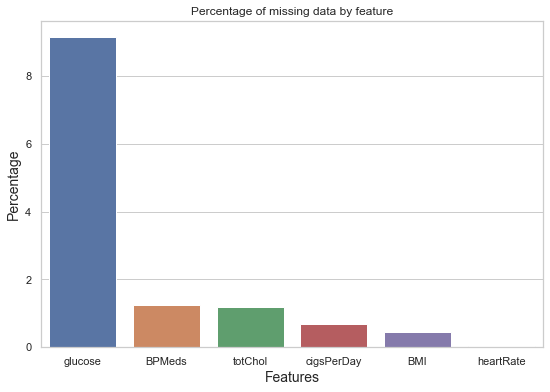

In [13]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

##### The blood glucose entry has the highest percentage of missing data i.e at 9.15% the rest have very few missing entries.

In [14]:
df.duplicated().sum()

0

#####  It shows that there are no Duplicated Values present in the dataset.

In [15]:
print((df["glucose"].mode())[0])

75.0


In [16]:
df["glucose"].fillna((df["glucose"].mode())[0], inplace=True)

#####  Filling the missing spaces of glucose column with the mode of the data (Mode = 75) present to reduce the number of missing data in our dataset

In [17]:
df.dropna(inplace=True)
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

##### Dropping all other rows containing missing values

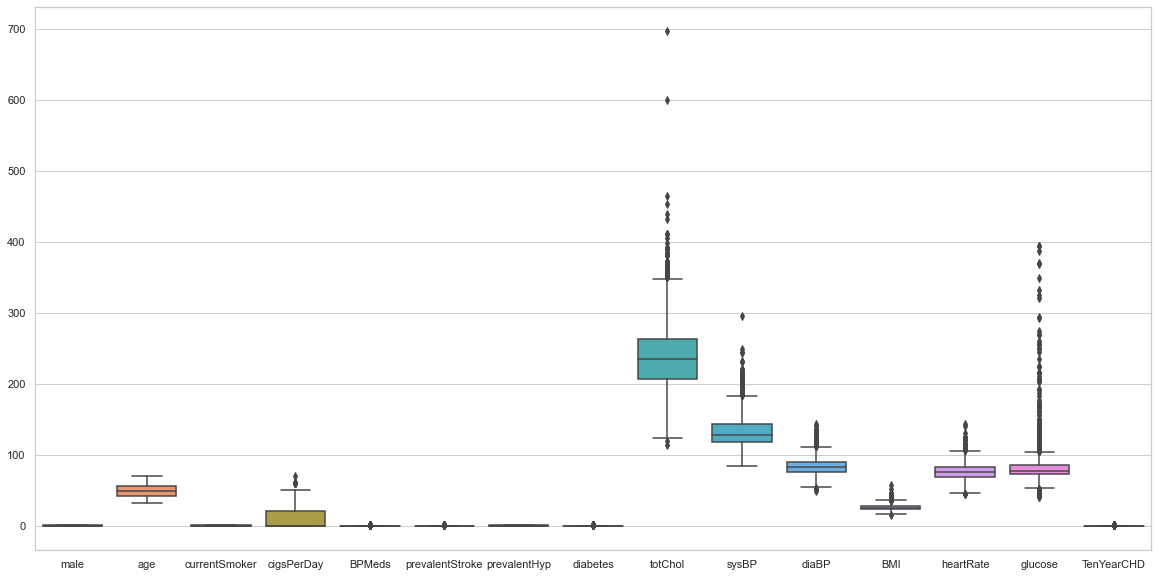

In [18]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df)
plt.show()

##### Removable Outliers are detected in totChol and sysBP columns of our dataset. Outliers in all other numerical columns are important and thus cannot be removed

In [19]:
df['totChol'].max()

696.0

##### The Outlier present in totChol is 600.

In [20]:
df['sysBP'].max()

295.0

##### The Outlier present in sysBP is 295.

In [21]:
df = df[df['totChol']<600.0]
df = df[df['sysBP']<295.0]
df.shape

(4087, 15)

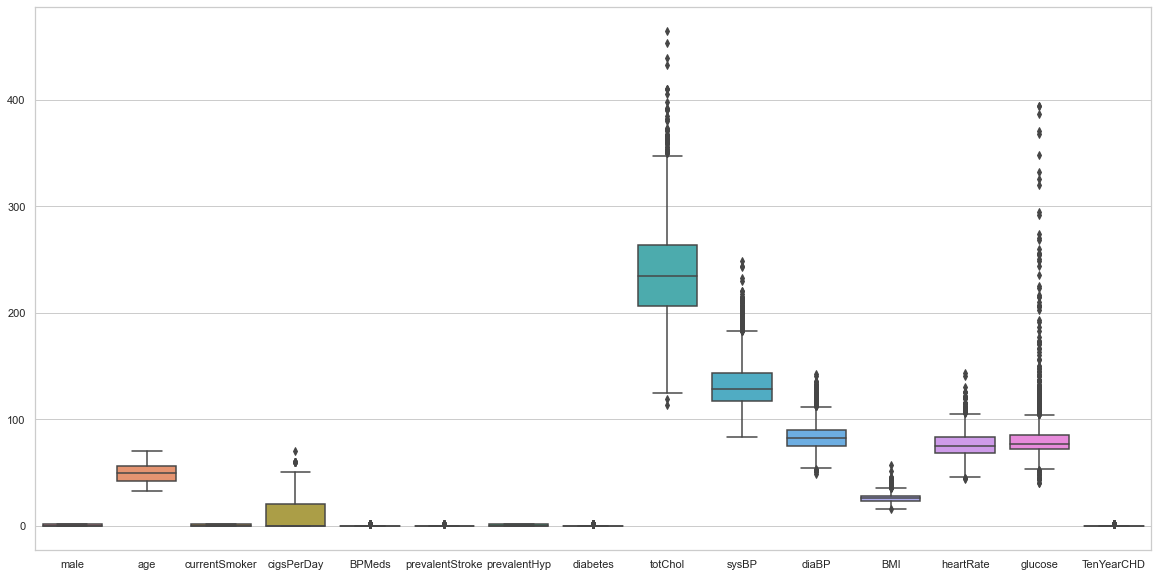

In [22]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df)
plt.show()

##### Now with the missing values, outliers and duplicate values dealt with, we proceed to perform EDA

## Step 4: Data Analysis 

In [23]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000
mean,0.434793,49.494984,0.490335,8.999755,0.029361,0.005383,0.308784,0.025202,236.454368,132.173966,82.876193,25.794186,75.827012,81.297529,0.149009
std,0.495791,8.542194,0.499968,11.916098,0.168838,0.073180,0.462048,0.156757,43.529049,21.753378,11.814279,4.073797,12.061483,22.938714,0.356141
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.250000,89.500000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,56.800000,143.000000,394.000000,1.000000


##### An overall statistical information is shown
- It is clearly evident that none of the data is missing in columns.
- It also shows the mean, standard deviation and other statistical metrics of the dataset
- It also shows the categorical data of the dataset since they were already converted into discrete numerical values.

### 1. Univariate Analysis

### A. Categorical Features

In [24]:
categorical_features = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [25]:
for feature in categorical_features:
    print(feature,':')
    print(df[feature].value_counts())
    print("-----------------")

male :
0    2310
1    1777
Name: male, dtype: int64
-----------------
currentSmoker :
0    2083
1    2004
Name: currentSmoker, dtype: int64
-----------------
BPMeds :
0.0    3967
1.0     120
Name: BPMeds, dtype: int64
-----------------
prevalentStroke :
0    4065
1      22
Name: prevalentStroke, dtype: int64
-----------------
prevalentHyp :
0    2825
1    1262
Name: prevalentHyp, dtype: int64
-----------------
diabetes :
0    3984
1     103
Name: diabetes, dtype: int64
-----------------


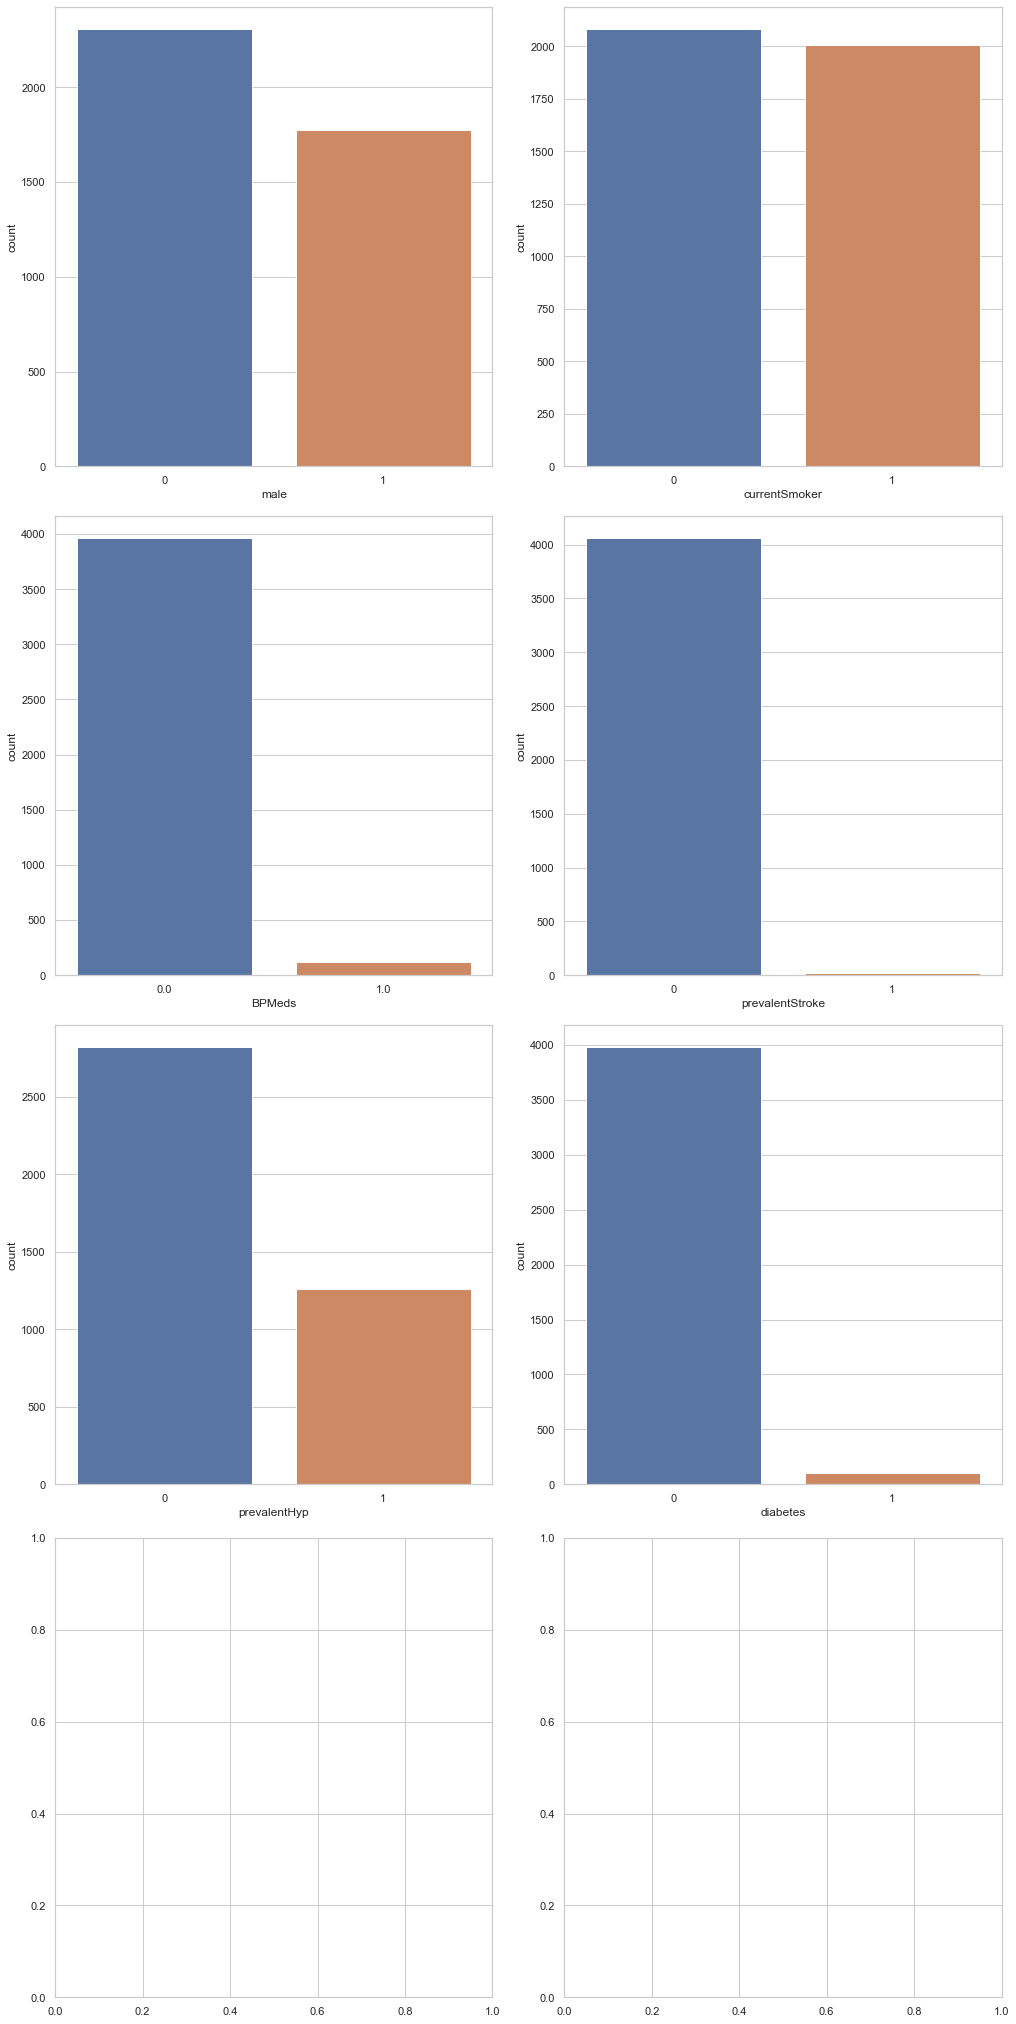

In [26]:
num_plots = len(categorical_features)
total_cols = 2
total_rows = (num_plots//total_cols) + 1

fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)

for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=df, ax=axs[row][pos])

##### Among the categorical features:

- BPmeds, prevalentStroke and diabetes are highly imbalanced.
- There are four levels of education whereas the rest categorical features are all binary
- The number of Smokers and non-Smokers in currentSmoker is almost the same

### B. Numerical Features

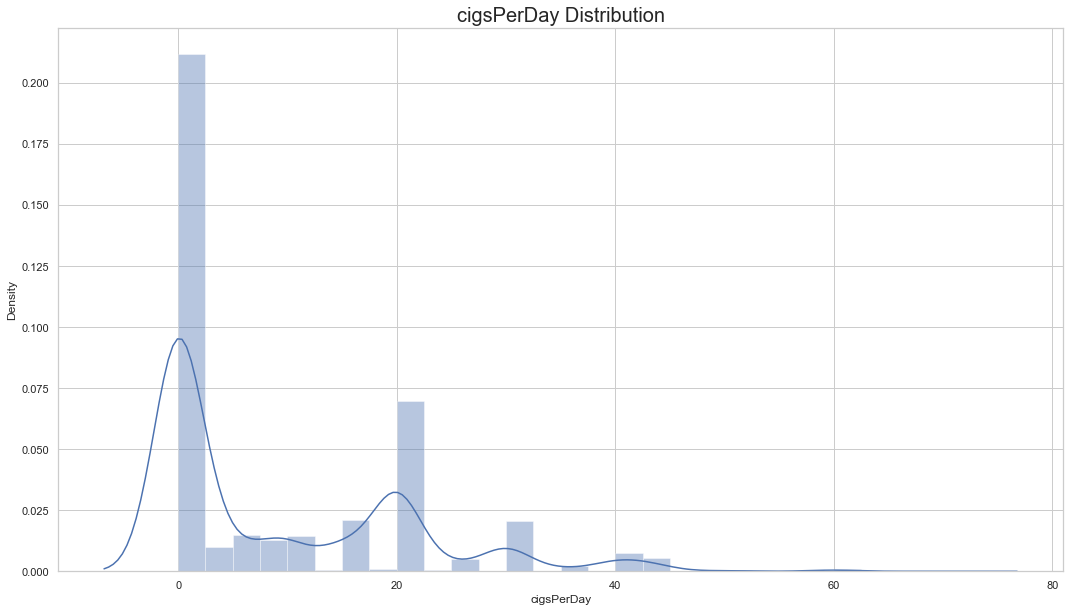

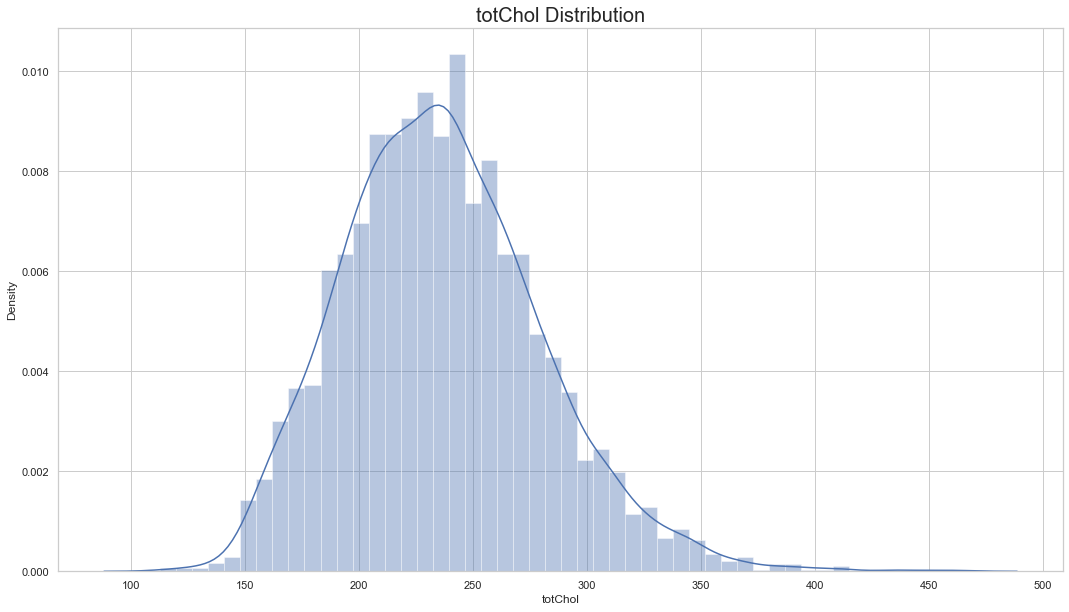

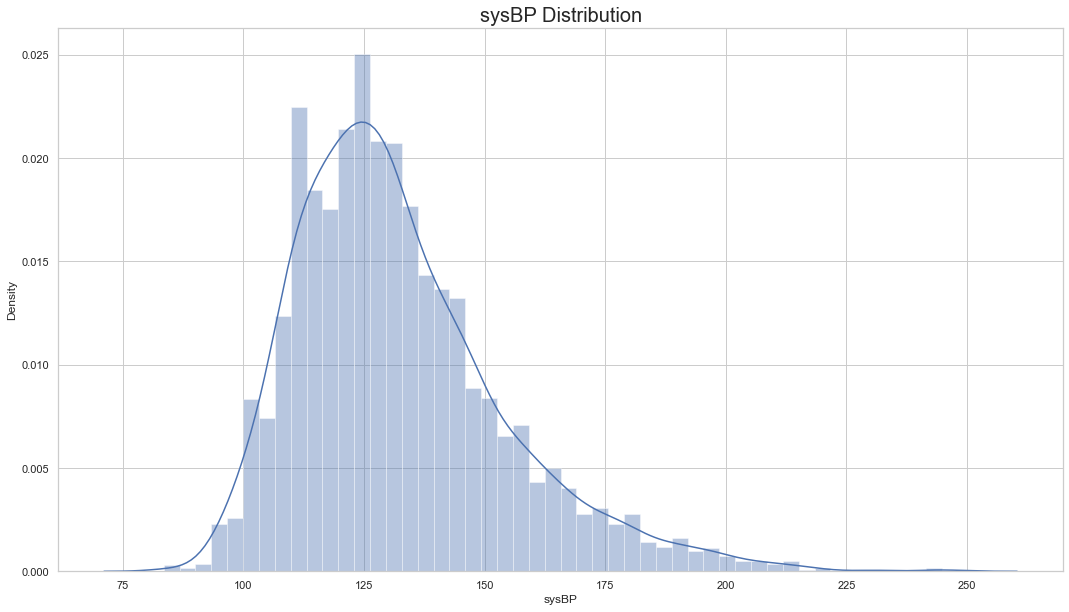

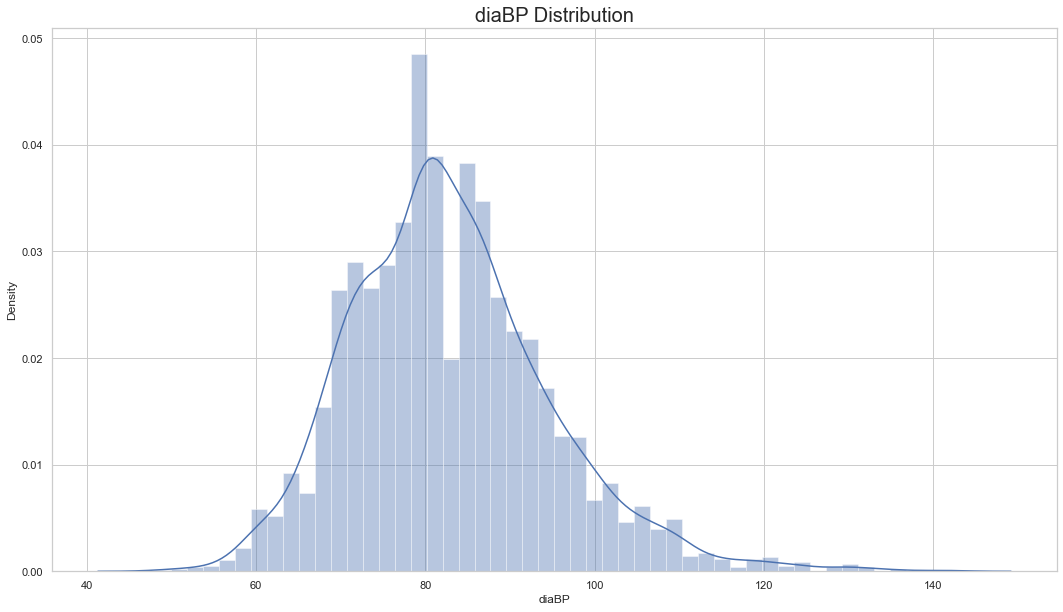

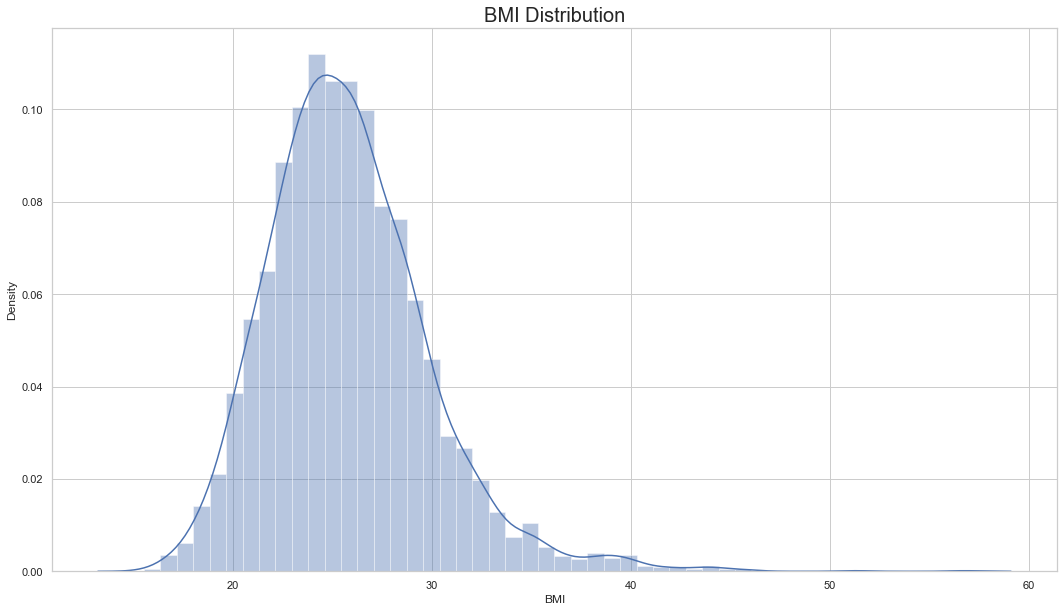

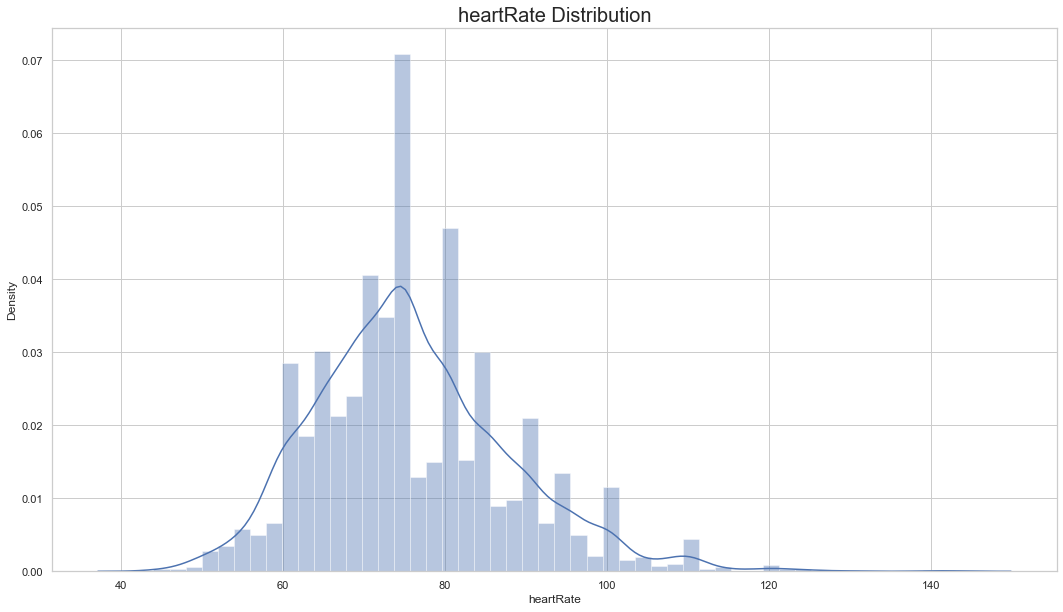

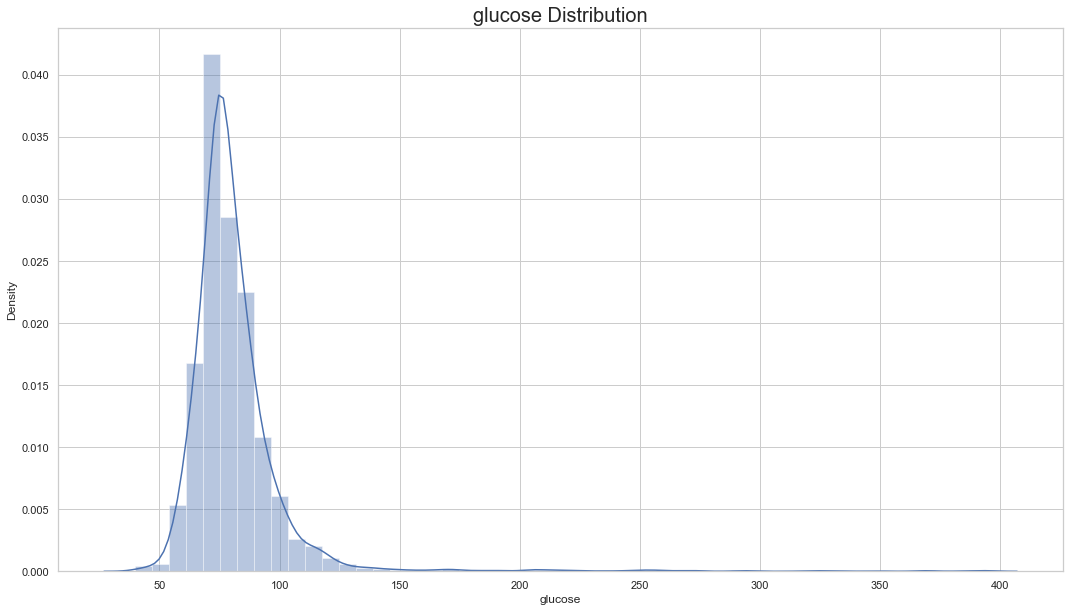

In [27]:
numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(df[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

##### Among the numerical features:

- totChol, sysBP, diaBPand BMI has an uniform distribution and the rest are unevenly distributed
- cigsPerDay has a highly uneven distribution with the most data present in 0
- cigsPerDay and sysBP shows quite a bit and slight right skewness respectively.

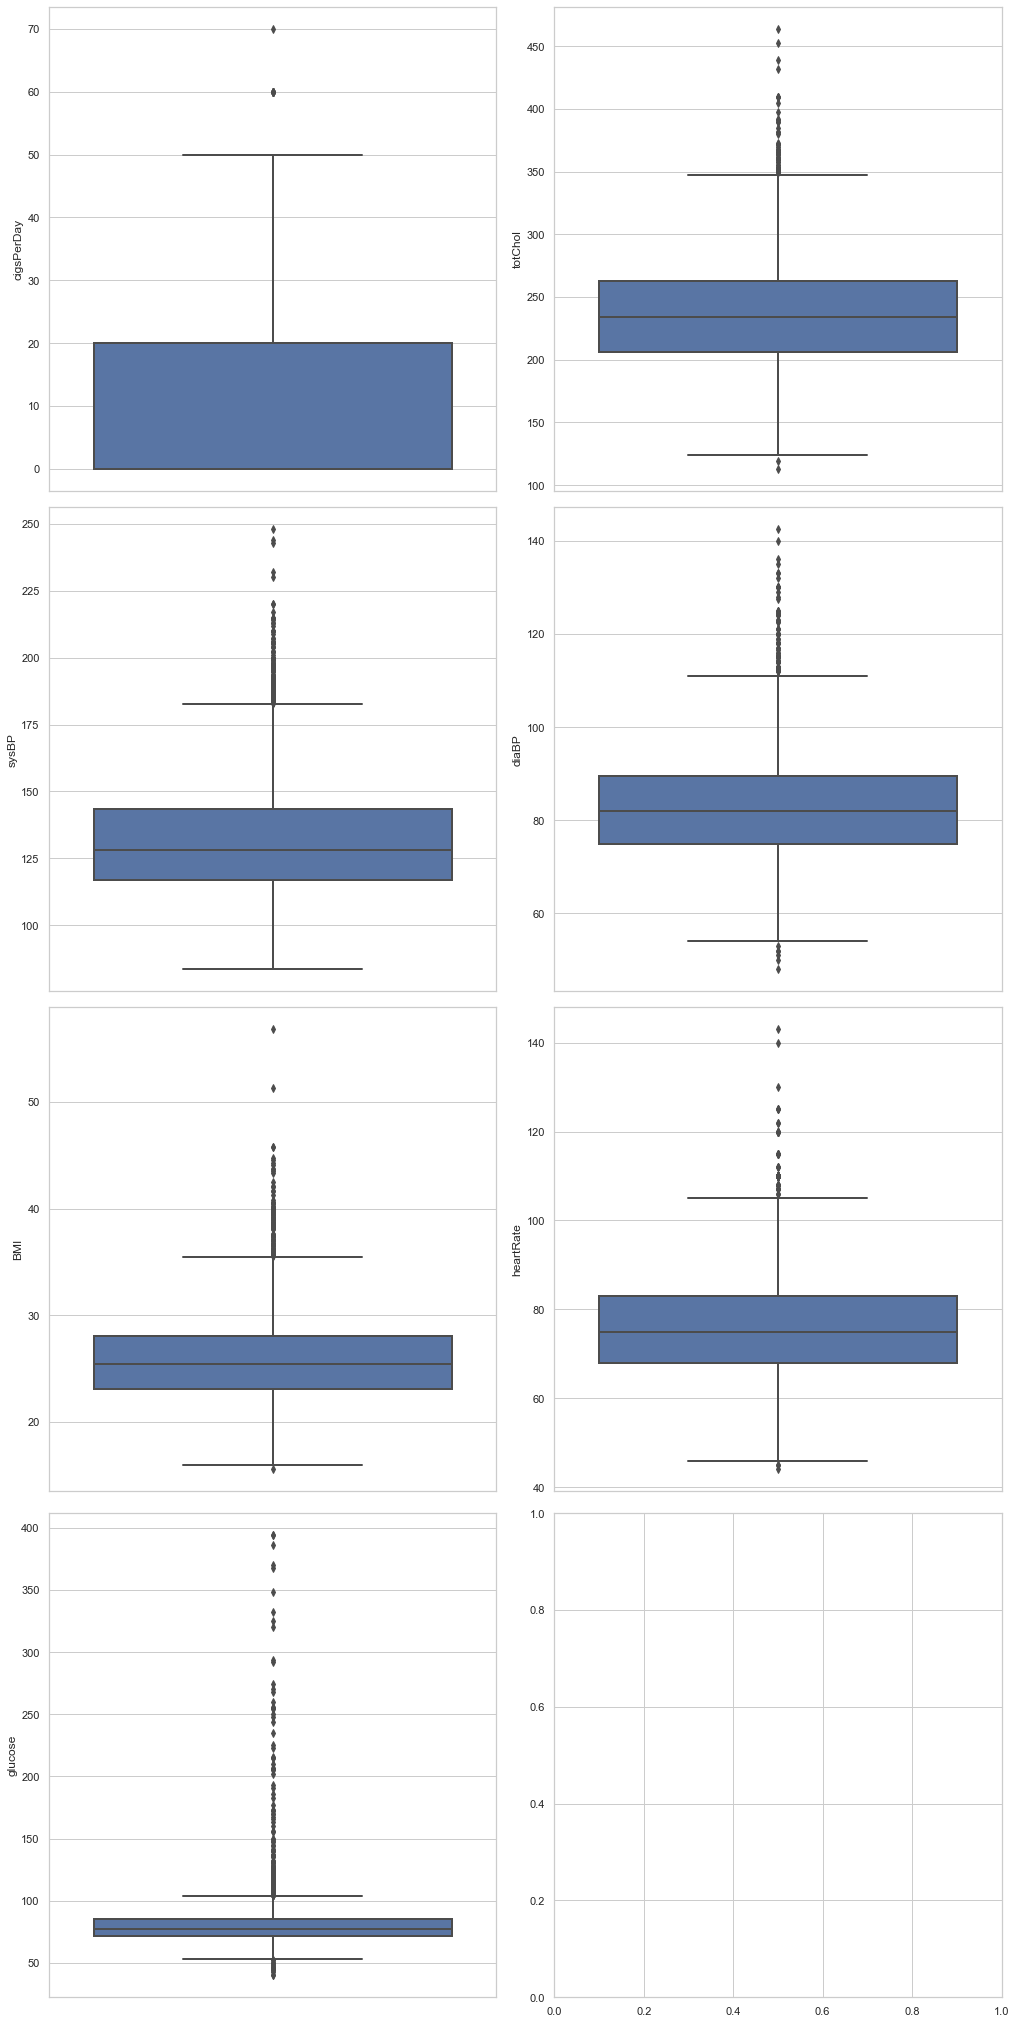

In [28]:
num_plots = len(numeric_features)
total_cols = 2
total_rows = num_plots//total_cols + 1

fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)

for i, var in enumerate(numeric_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.boxplot(y=var, data=df, ax=axs[row][pos], linewidth=2)

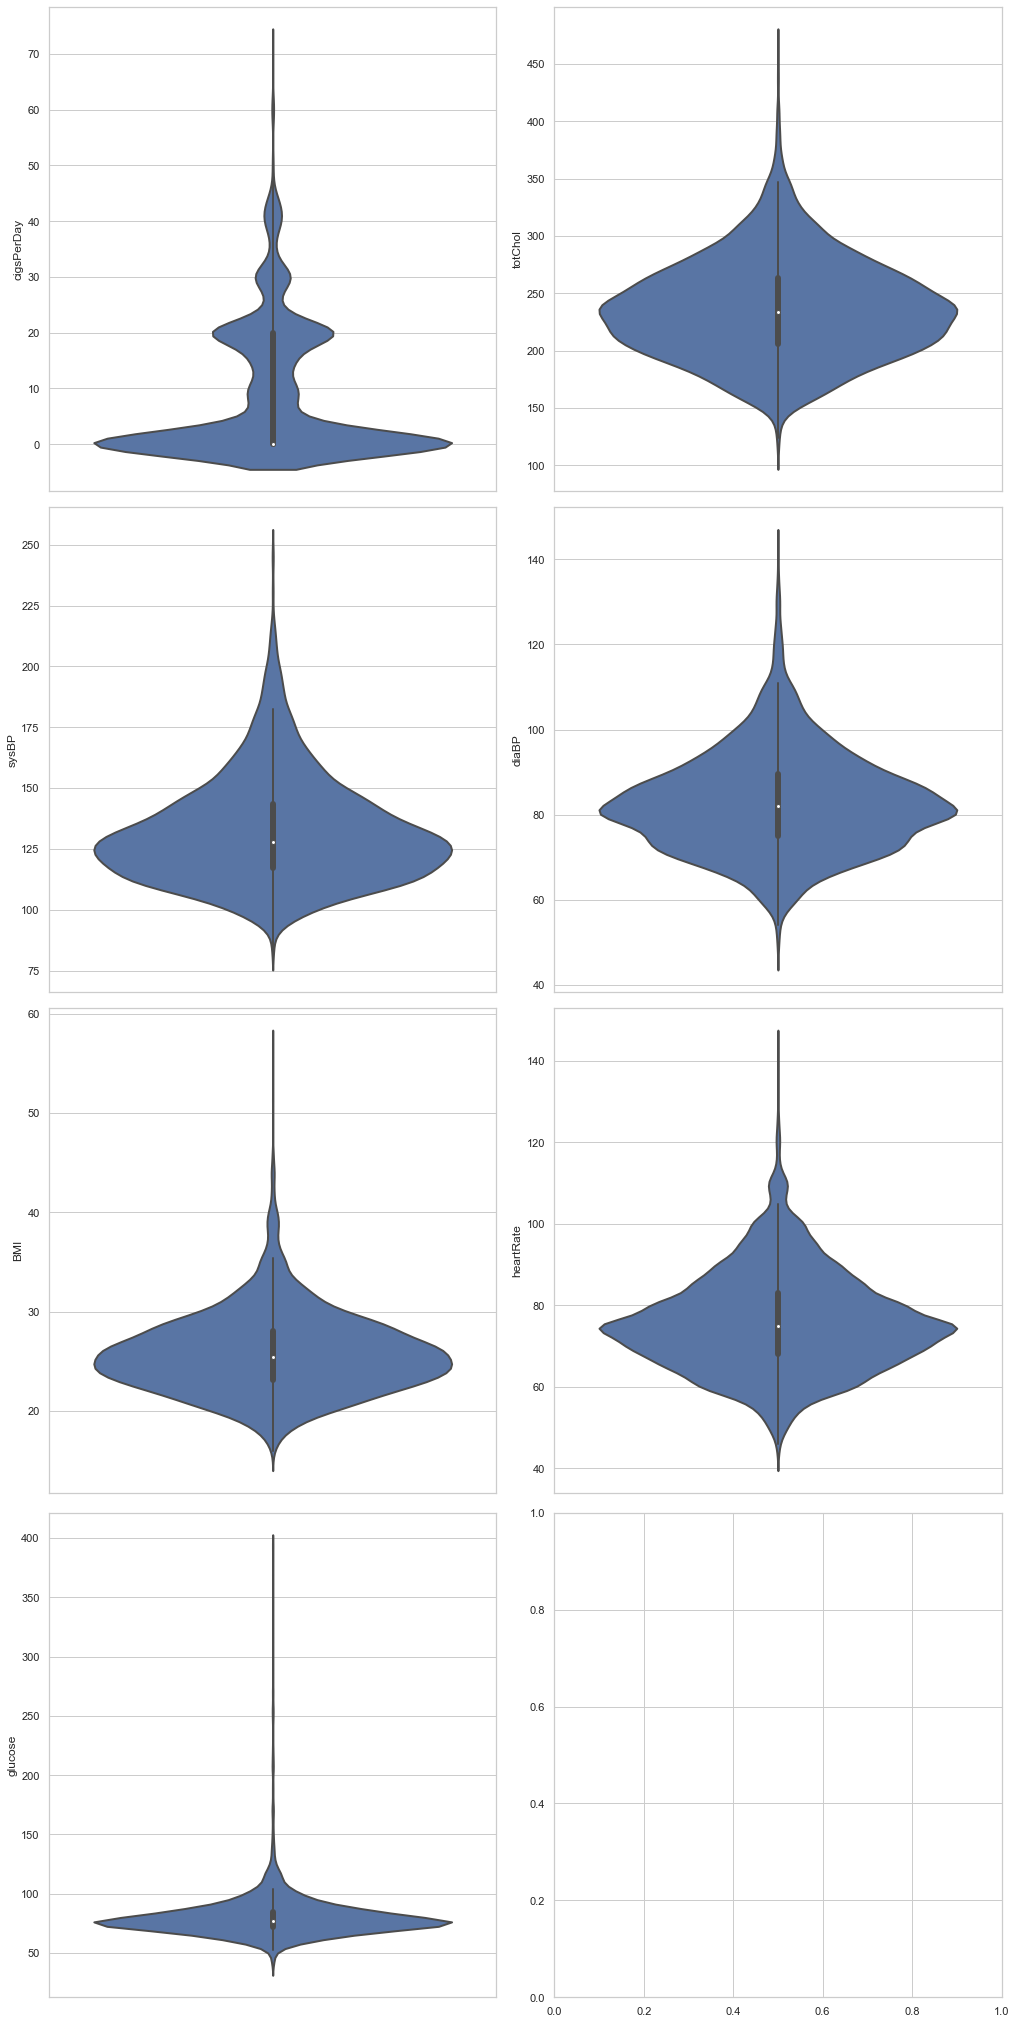

In [29]:
num_plots = len(numeric_features)
total_cols = 2
total_rows = num_plots//total_cols + 1

fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)

for i, var in enumerate(numeric_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.violinplot(y=var, data=df, ax=axs[row][pos], linewidth=2)

##### For the same numerical features:

- cigsPerDay has uneven distribution although most of the data is concentrated on 0
- The majority portions of the following columns lie in the range:
    - totChol: 150 to 300
    - sysBP: 100 to 150
    - diaBP: 60 to 100
    - BMI: 20 to 30
    - heartRate: 50 to 100
    - glucose: 50 to 150

### C. Target Variable

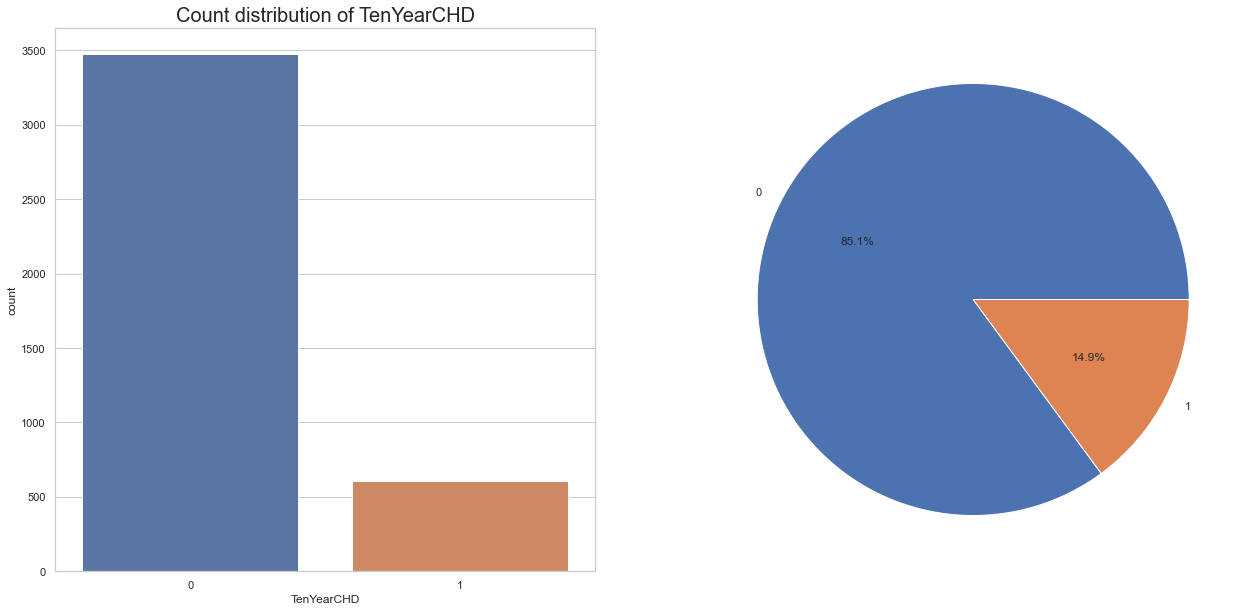

In [30]:
# Distribution of outcome variable, Heart Disease
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(1, 2, 1)

sns.countplot(x="TenYearCHD", data=df)
plt.title("Count distribution of TenYearCHD", size=20)
plt.subplot(1, 2, 2)
labels=[0,1]
plt.pie(df["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels)
plt.show()

- The distribution is highly imbalanced. As in, the number of negative cases outweigh the number of positive cases. This would lead to class imbalance problem while fitting our models. Therefore, this problem needs to be addressed and taken care of.

##  2. Bivariate Analysis

##### Question 1: Which gender has more risk of coronary heart disease CHD?

In [31]:
# Checking for which gender has more risk of coronary heart disease CHD
graph_1 = df.groupby(['male'], as_index=False)['TenYearCHD'].sum()
graph_1

,male,TenYearCHD
0,0,274
1,1,335


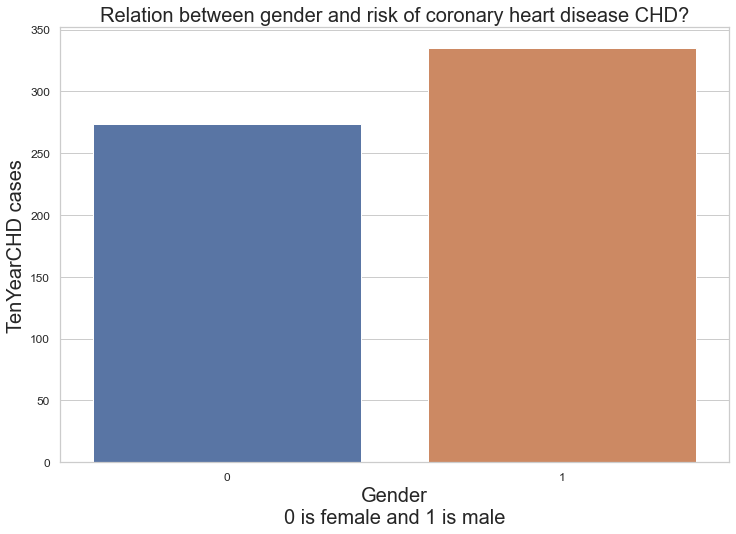

In [32]:
# Ploting the above values

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_1["male"], y=graph_1["TenYearCHD"])
plt.title("Relation between gender and risk of coronary heart disease CHD?", size=20)
plt.xlabel("Gender\n0 is female and 1 is male",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12);

- According to this dataset, males have shown a slighly higher risk of coronary heart disease TenYearCHD.

##### Question 2: Relation between smoking and risk of coronary heart disease CHD?

In [33]:
# Relation between smoking and risk of coronary heart disease CHD
graph_2 = df.groupby(['currentSmoker'], as_index=False)['TenYearCHD'].sum()
graph_2

,currentSmoker,TenYearCHD
0,0,291
1,1,318


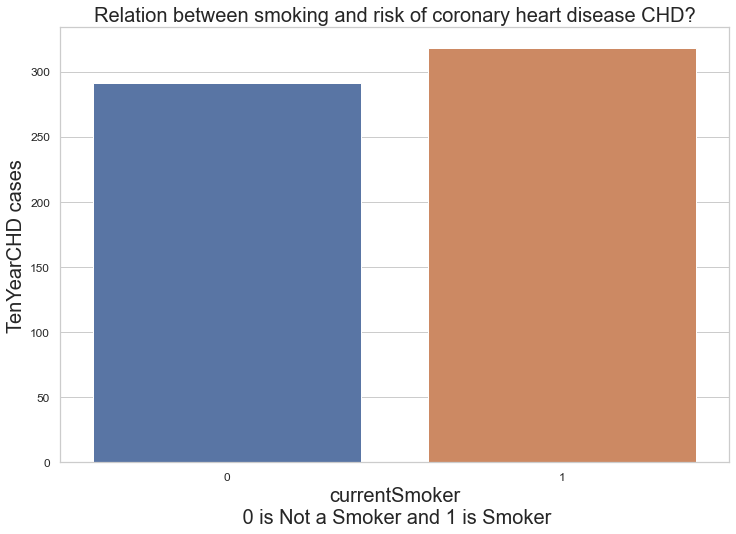

In [34]:
plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_2["currentSmoker"], y=graph_2["TenYearCHD"])
plt.title("Relation between smoking and risk of coronary heart disease CHD?", size=20)
plt.xlabel("currentSmoker\n 0 is Not a Smoker and 1 is Smoker",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12);

##### Question 3: Relation between diabetes and risk of coronary heart disease CHD?

In [35]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [36]:
# Relation between diabetes and risk of coronary heart disease CHD
graph_3 = df.groupby(['diabetes'], as_index=False)['TenYearCHD'].sum()
graph_3

,diabetes,TenYearCHD
0,0,574
1,1,35


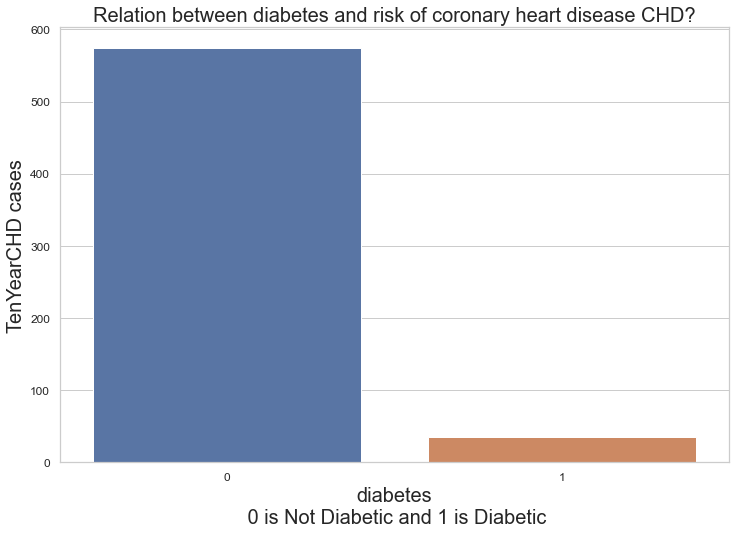

In [37]:
plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_3["diabetes"], y=graph_3["TenYearCHD"])
plt.title("Relation between diabetes and risk of coronary heart disease CHD?", size=20)
plt.xlabel("diabetes\n 0 is Not Diabetic and 1 is Diabetic",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12);

- The odds of developing CHD are higher in the diabetic patients

##### Question 4: Relation between BPMeds and risk of coronary heart disease CHD?

In [38]:
# Relation between diabetes and risk of coronary heart disease CHD
graph_4 = df.groupby(['BPMeds'], as_index=False)['TenYearCHD'].sum()
graph_4

,BPMeds,TenYearCHD
0,0.0,570
1,1.0,39


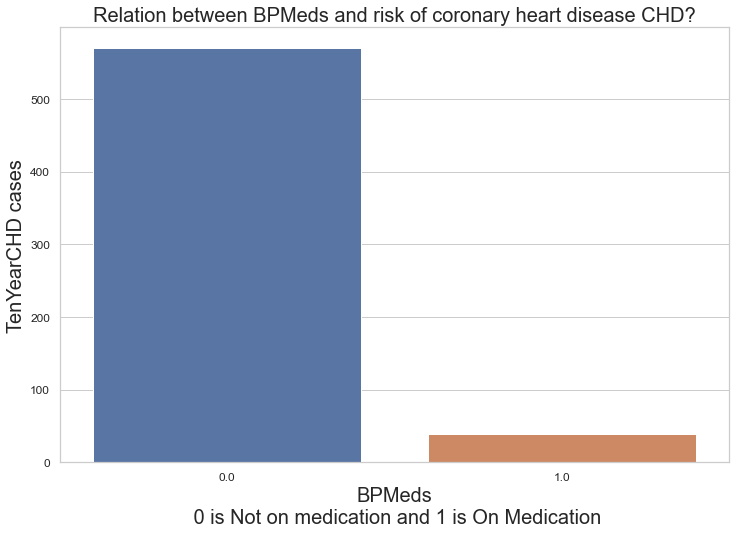

In [39]:
plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_4["BPMeds"], y=graph_4["TenYearCHD"])
plt.title("Relation between BPMeds and risk of coronary heart disease CHD?", size=20)
plt.xlabel("BPMeds\n 0 is Not on medication and 1 is On Medication",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12);

##### Question 5: Relation between BPMeds and risk of coronary heart disease CHD?

In [40]:
# Relation between Hypertension and risk of coronary heart disease CHD
graph_5 = df.groupby(['prevalentHyp'], as_index=False)['TenYearCHD'].sum()
graph_5

,prevalentHyp,TenYearCHD
0,0,305
1,1,304


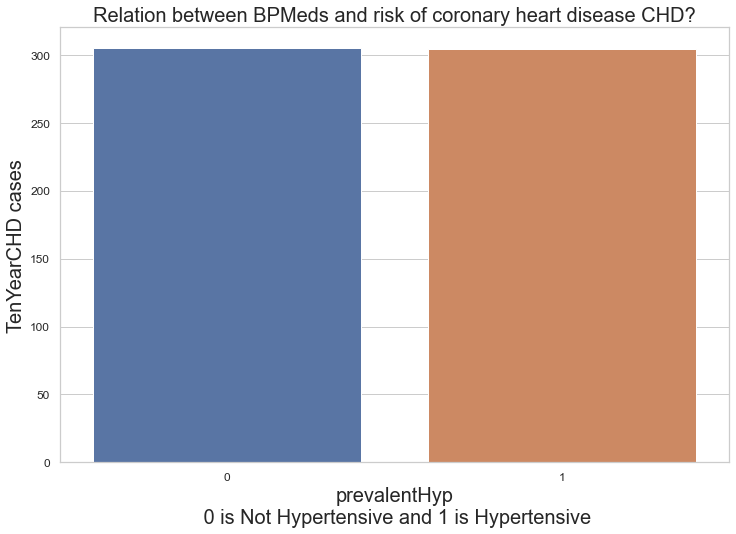

In [41]:
plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_5["prevalentHyp"], y=graph_5["TenYearCHD"])
plt.title("Relation between BPMeds and risk of coronary heart disease CHD?", size=20)
plt.xlabel("prevalentHyp\n 0 is Not Hypertensive and 1 is Hypertensive",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12);

##### Question 6: Relation between cigsPerDay and risk of coronary heart disease.

In [42]:
# Checking for which gender has more risk of coronary heart disease CHD

graph_6 = df.groupby(['cigsPerDay'], as_index=False)['TenYearCHD'].sum()
graph_6

,cigsPerDay,TenYearCHD
0,0.0,291
1,1.0,7
2,2.0,2
3,3.0,9
4,4.0,0
5,5.0,14
6,6.0,3
7,7.0,3
8,8.0,0
9,9.0,10


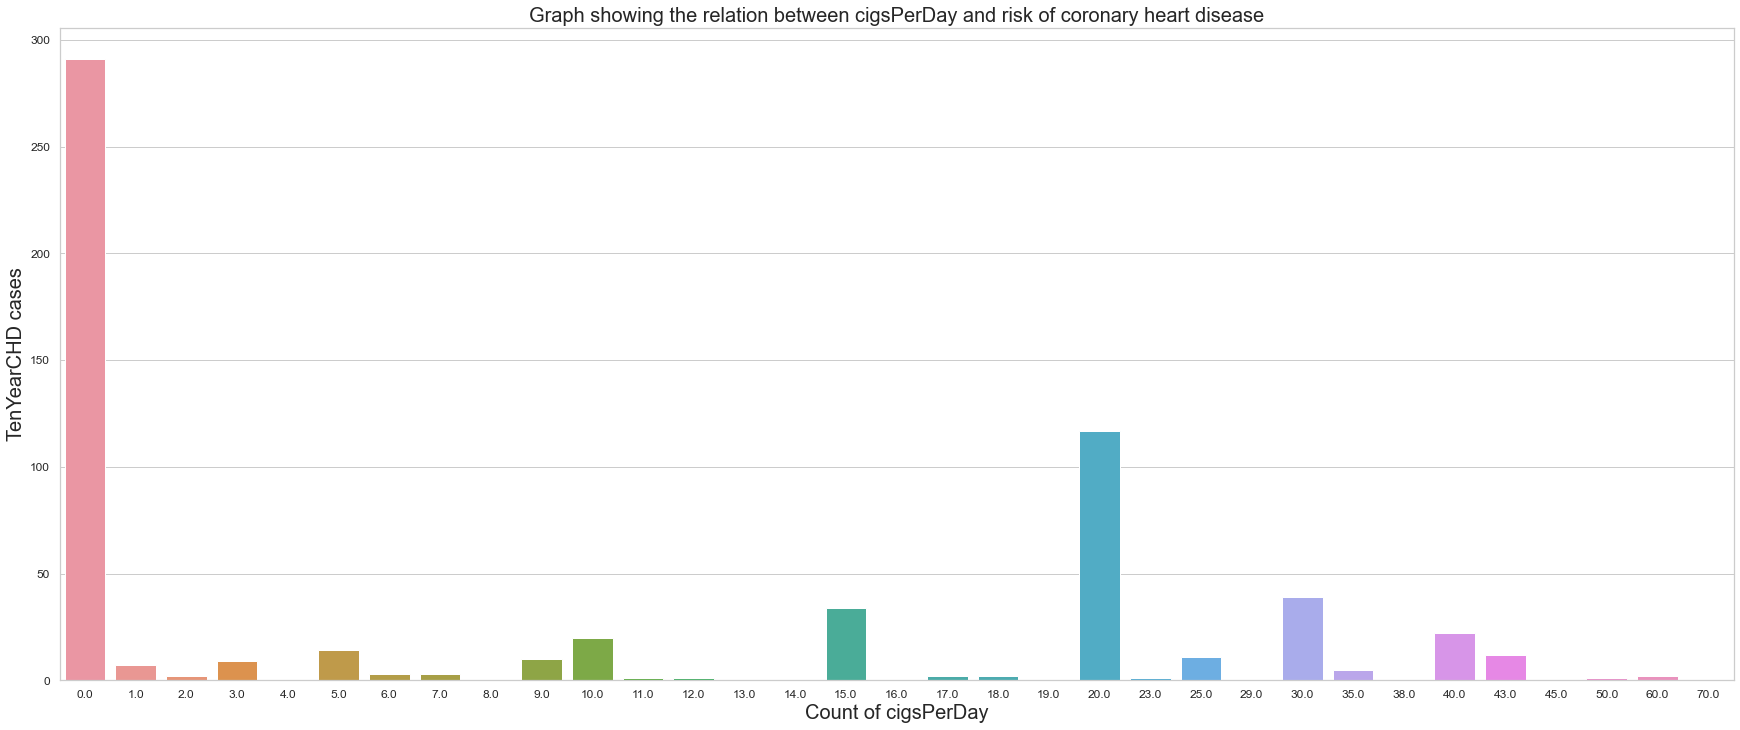

In [43]:
#Ploting the above values
plt.figure(figsize=(30,12), facecolor='w')
sns.barplot(x=graph_6["cigsPerDay"], y=graph_6["TenYearCHD"])
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease", size=20)
plt.xlabel("Count of cigsPerDay",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12);

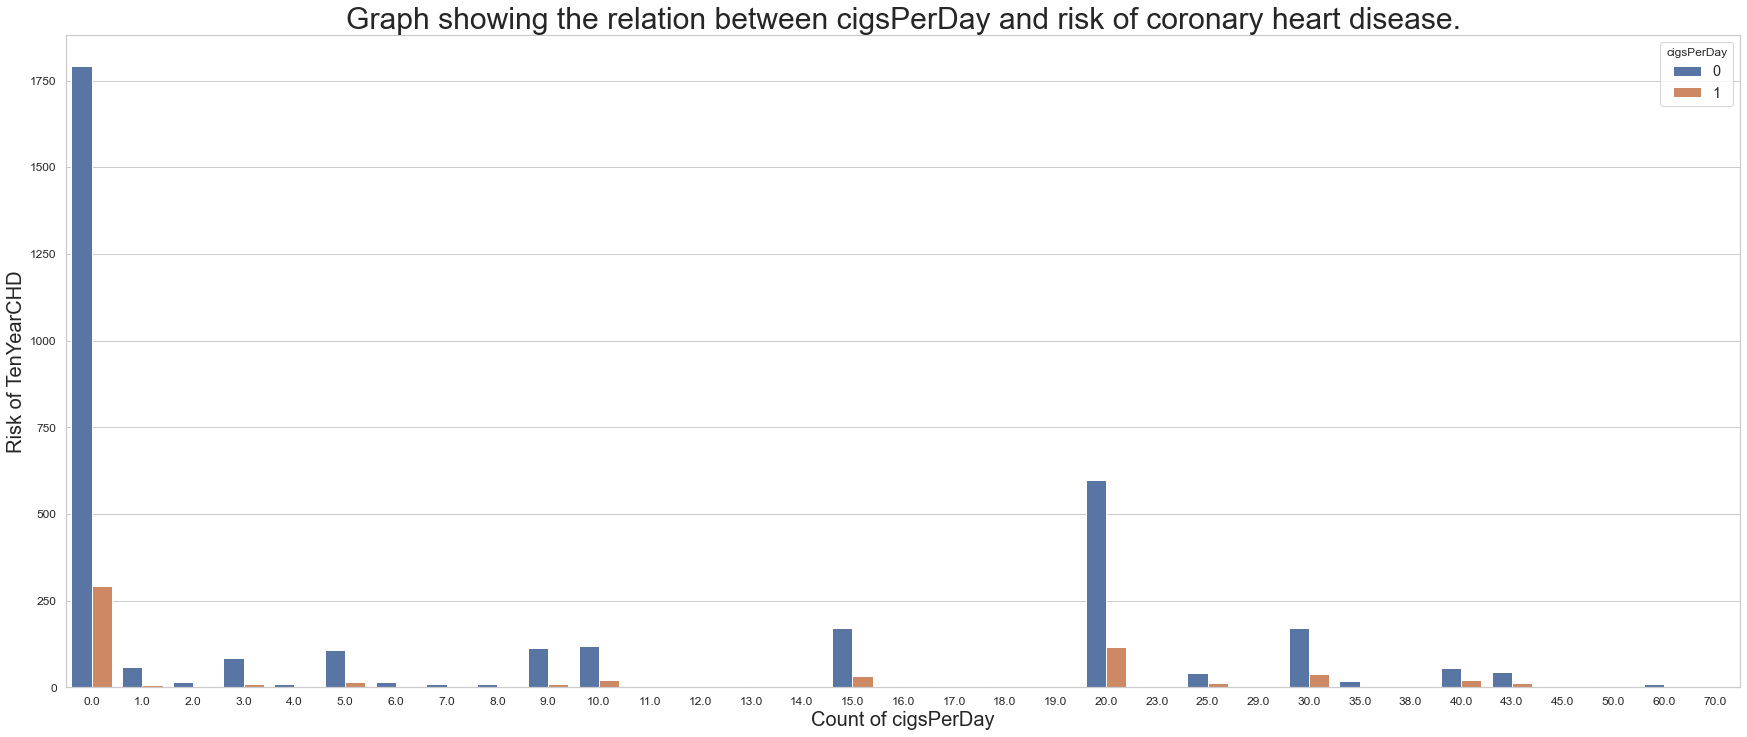

In [44]:
# Ploting the above values
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="cigsPerDay",data=df,hue="TenYearCHD")
plt.legend(title='cigsPerDay', fontsize='large')
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease.", size=30)
plt.xlabel("Count of cigsPerDay", size=20)
plt.ylabel("Risk of TenYearCHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

- Those who don't smoke, i.e., with a cigsPerDay of 0.0 has a really low risk of contracting the disease
- Low cigsPerDay doesn't actually guarantee a much lower risk of CHD

##### Question 7: Relation between sysBP and risk of CHD. 

In [45]:
# Grouping up the data and ploting it
graph_7 = df.groupby(['TenYearCHD'], as_index=False)['sysBP'].mean()
graph_7

,TenYearCHD,sysBP
0,0,130.246981
1,1,143.178982


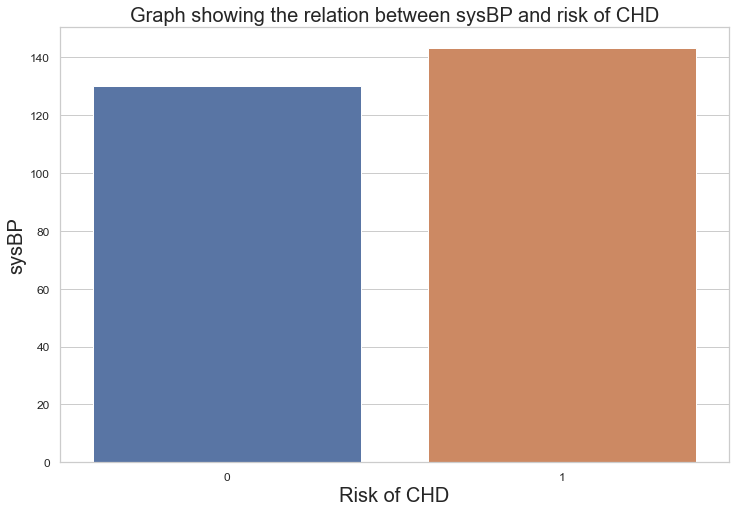

In [46]:
plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_7["TenYearCHD"], y=graph_7["sysBP"])
plt.title("Graph showing the relation between sysBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("sysBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12);

##### Question 8: Which age group has more risk of CHD?

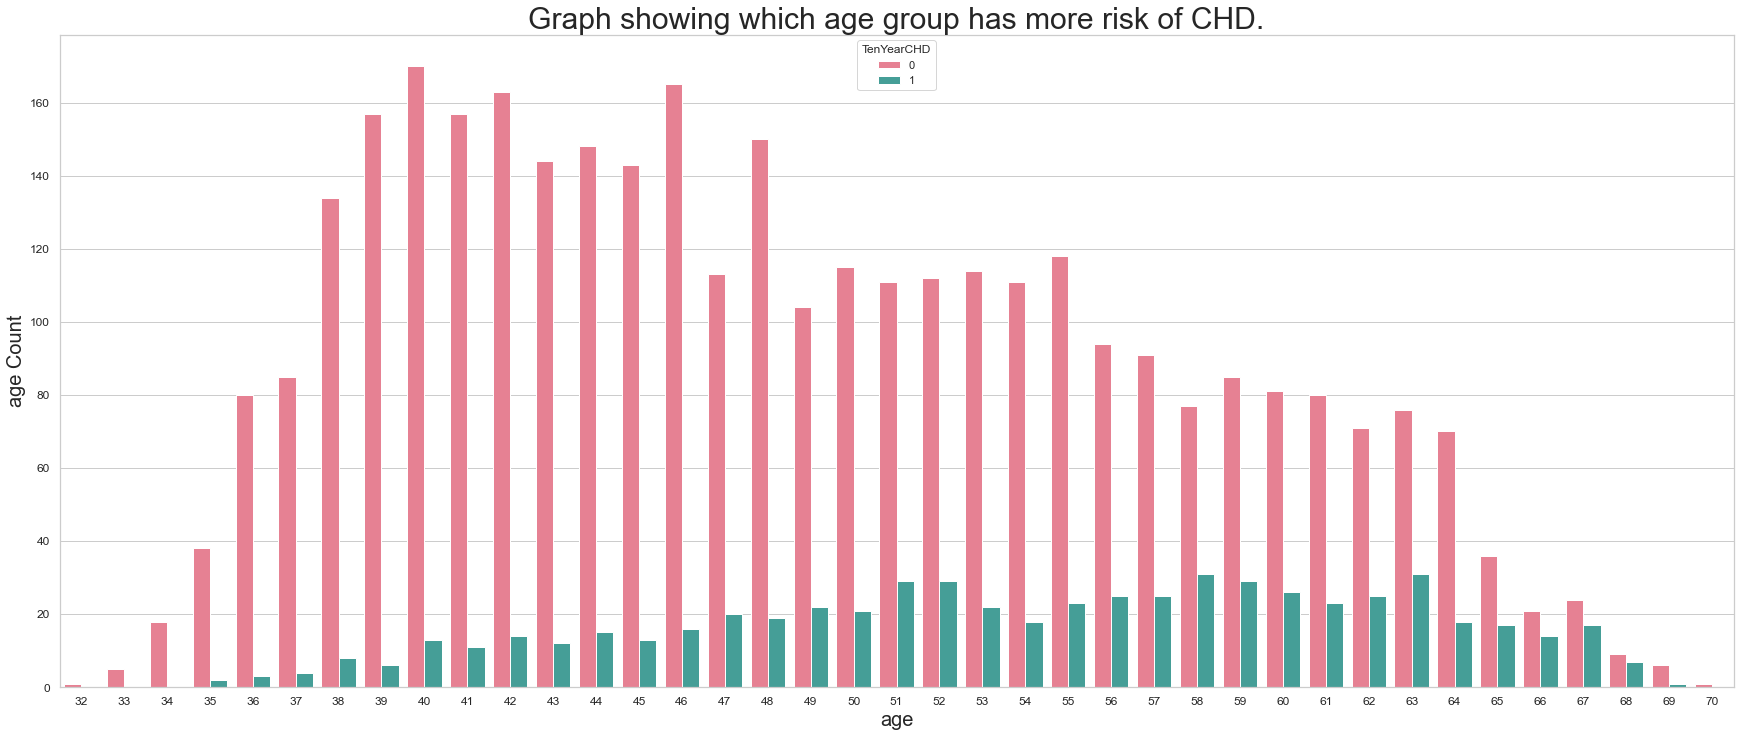

In [47]:
# Relation between CHD and age group
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="age",data=df,hue="TenYearCHD",palette='husl')
plt.title("Graph showing which age group has more risk of CHD.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("age Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12);

- The people with the highest risk of developing CHD are betwwen the ages of 51 and 63 i.e. the blue bars

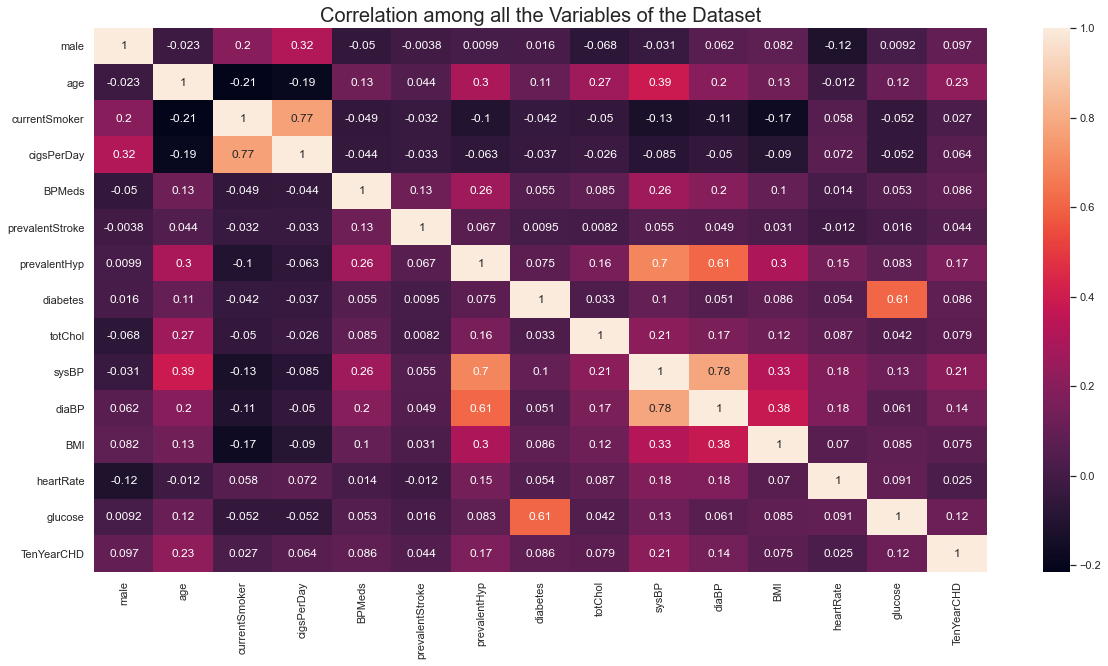

In [48]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10)) # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
plt.show()

- There are no features with more than 0.5 correlation with the Ten year risk of developing CHD and this shows that the features a poor predictors.
- Also, there are a couple of features that are highly correlated with one another and it makes no sense to use both of them in building a machine learning model.
- These incluse: Blood glucose and diabetes (obviously); systolic and diastolic blood pressures; cigarette smoking and the number of cigarretes smoked per day. Therefore we need to carry out feature selection to pick the best fetaures

## Step 4: Feature Selection

- Here we will use the Boruta algorithm which is a wrapper built around the random forest classification algorithm. It tries to capture all the important, interesting features in a data set with respect to an outcome variable.

#### Methodology:
- Firstly, it adds randomness to the given data set by creating shuffled copies of all features (which are called shadow features).

- Then, it trains a random forest classifier on the extended data set and applies a feature importance measure (the default is Mean Decrease Accuracy) to evaluate the importance of each feature where higher means more important.

- At every iteration, it checks whether a real feature has a higher importance than the best of its shadow features (i.e. whether the feature has a higher Z-score than the maximum Z-score of its shadow features) and constantly removes features which are deemed highly unimportant.

- Finally, the algorithm stops either when all features get confirmed or rejected or it reaches a specified limit of random forest runs.

##### Reference Link:  http://danielhomola.com/2015/05/08/borutapy-an-all-relevant-feature-selection-method/

In [49]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [50]:
#define the features
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [51]:
forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

In [52]:
# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)

In [53]:
# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration:

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=28, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x199CFBF2440,
                                          verbose=0, warm_start

In [54]:
# show the most important features
most_important = df.columns[:-1][feat_selector.support_].tolist()
most_important

['age', 'sysBP']

In [55]:
# select the top 7 features
top_features = df.columns[:-1][feat_selector.ranking_ <= 6].tolist()
top_features

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

The top features are:

    1. Age
    2. Total cholesterol
    3. Systolic blood pressure
    4. Diastolic blood pressure
    5. BMI
    6. Heart rate
    7. Blood glucose

#### Statistics on the top features:

In [56]:
import statsmodels.api as sm

In [57]:
X_top = df[top_features]
y = df['TenYearCHD']

In [58]:
res = sm.Logit(y,X_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.412068
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4087
Model:                          Logit   Df Residuals:                     4080
Method:                           MLE   Df Model:                            6
Date:                Thu, 08 Jul 2021   Pseudo R-squ.:                 0.02118
Time:                        23:11:54   Log-Likelihood:                -1684.1
converged:                       True   LL-Null:                       -1720.6
Covariance Type:            nonrobust   LLR p-value:                 1.040e-13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0240      0.005      4.394      0.000       0.013       0.035
totChol       -0.0038      0.001     -3.545      0.000      -0.006      -0.002
sysBP          0.0232      0.003      7.172      0.000       0.017       0.030
diaBP         -0.0247      0.006     -4.327      0.000      -0.036      -0.014
BMI           -0.0538      0.012     -4.660      0.000      -0.076      -0.031
heartRate     -0.0272      0.004     -7.745      0.000      -0.034      -0.020
glucose        0.0041      0.002      2.497      0.013       0.001       0.007
==============================================================================
"""

In [59]:
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                 5%       95%  Odds Ratio
age        1.013379  1.035302    1.024282
totChol    0.994175  0.998319    0.996245
sysBP      1.017035  1.030037    1.023516
diaBP      0.964773  0.986589    0.975620
BMI        0.926396  0.969299    0.947604
heartRate  0.966457  0.979867    0.973139
glucose    1.000879  1.007324    1.004097


- Holding all other features constant, the odds of getting diagnosed with heart disease increases with about 2% for every increase in age an systolic blood pressure

- The other factors show no significant change

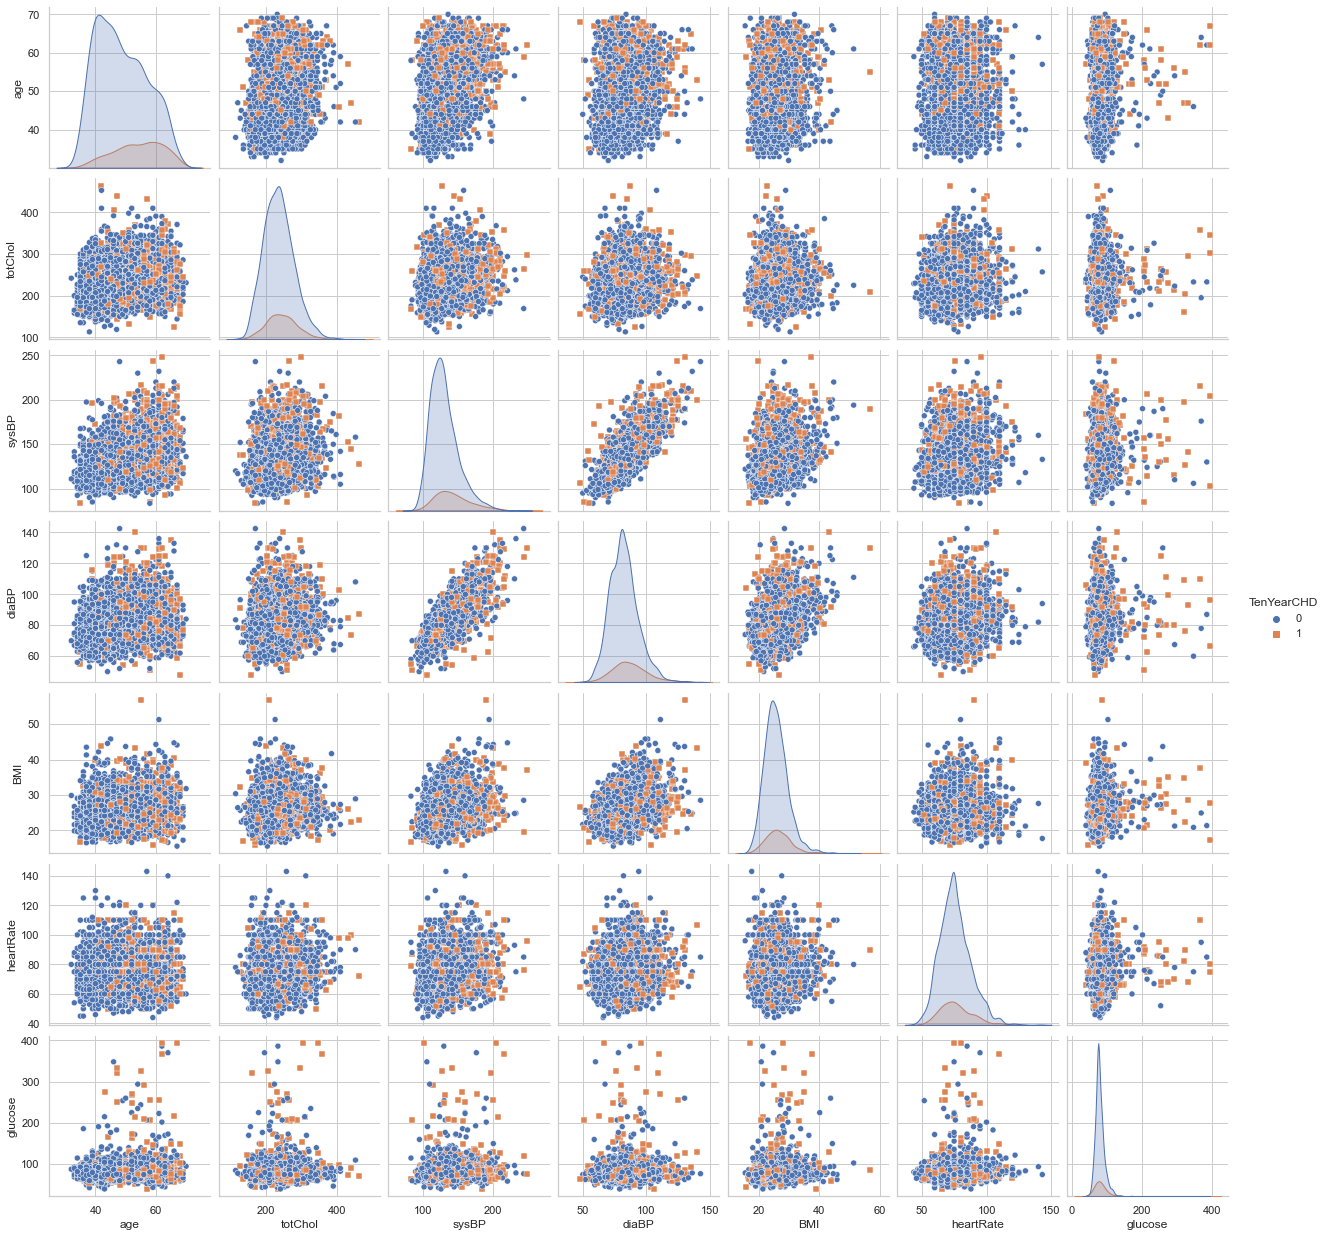

In [60]:
# pairplots
sns.pairplot(df, hue = 'TenYearCHD', markers=["o", "s"], vars = top_features)

- There are no characteristics that split the data well

## Step 5: Models and predictions

- Since the dataset is imbalanced i.e for every positive case there are about 6 negative cases. We may end up with a classifier that mostly predicts negative classes thus have a high accuracy but poor specificity or sensitivity.
- To address this we will balance the dataset using The Synthetic Minority Oversampling Technique (SMOTE).

### 5.1 SMOTE
- SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

— Page 47, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.

- This procedure can be used to create as many synthetic examples for the minority class as are required. It suggests first using random undersampling to trim the number of examples in the majority class, then use SMOTE to oversample the minority class to balance the class distribution.

In [61]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [62]:
X = df[top_features]
y = df.iloc[:,-1]

In [63]:
# the numbers before smote
num_before = dict(Counter(y))

#perform smoting

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after smote
num_after =dict(Counter(y_smote))

In [64]:
print(num_before, num_after)

{0: 3478, 1: 609} {0: 3477, 1: 2782}


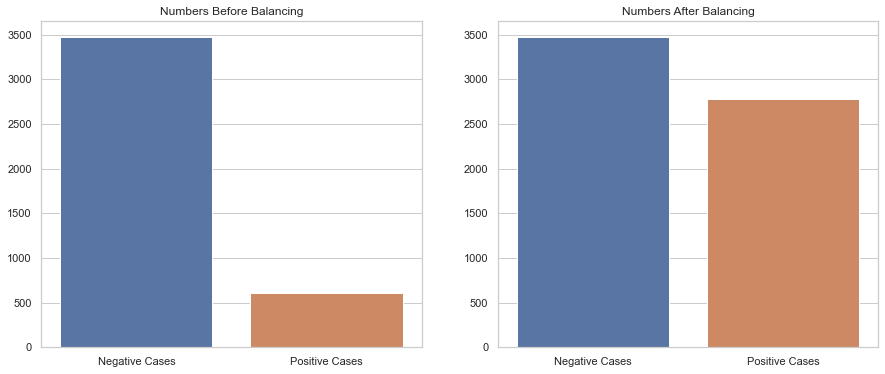

In [65]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")

plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")

plt.show()

### 5.2 Splitting data to Training and Testing set

In [66]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
new_data.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,42,256.0,129.0,85.5,31.84,95.0,74.0,0
1,46,184.0,188.0,123.0,34.36,90.0,75.0,0
2,46,210.0,154.0,91.0,26.25,88.0,82.0,0
3,40,220.0,113.0,78.0,24.29,68.0,75.0,0
4,43,202.0,124.0,92.0,21.26,75.0,74.0,0


In [67]:
X_new = new_data[top_features]
X_new.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,42,256.0,129.0,85.5,31.84,95.0,74.0
1,46,184.0,188.0,123.0,34.36,90.0,75.0
2,46,210.0,154.0,91.0,26.25,88.0,82.0
3,40,220.0,113.0,78.0,24.29,68.0,75.0
4,43,202.0,124.0,92.0,21.26,75.0,74.0


In [68]:
y_new= new_data.iloc[:,-1]
y_new.head()

0    0
1    0
2    0
3    0
4    0
Name: TenYearCHD, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

### 5.3 Feature Scaling

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

### 5.4 Models

### 5.4.1 Logistic regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [73]:
# Search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [74]:
# Train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}

In [75]:
# Make predictions
logistic_predict = logistic_clf.predict(X_test)

In [76]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 65.02%


In [77]:
cm=confusion_matrix(y_test,logistic_predict)
cm

array([[458, 251],
       [187, 356]], dtype=int64)

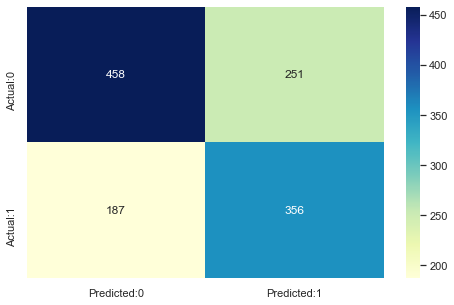

In [78]:
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [79]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       709
           1       0.59      0.66      0.62       543

    accuracy                           0.65      1252
   macro avg       0.65      0.65      0.65      1252
weighted avg       0.66      0.65      0.65      1252



In [80]:
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 61.91%


In [81]:
# ROC curve and AUC 
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

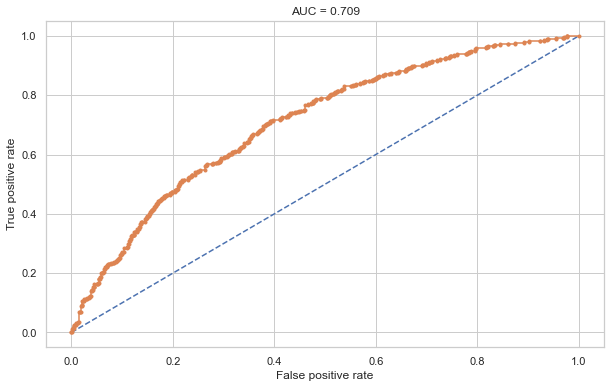

In [82]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

### 5.4.2 K-Nearest Neighbours

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [85]:
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_

{'n_neighbors': 1}

In [86]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [87]:
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 83.15%


In [88]:
cm=confusion_matrix(y_test,knn_predict)
cm

array([[529, 180],
       [ 31, 512]], dtype=int64)

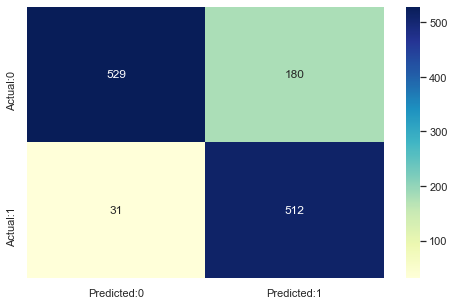

In [89]:
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [90]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83       709
           1       0.74      0.94      0.83       543

    accuracy                           0.83      1252
   macro avg       0.84      0.84      0.83      1252
weighted avg       0.86      0.83      0.83      1252



In [91]:
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 82.91%


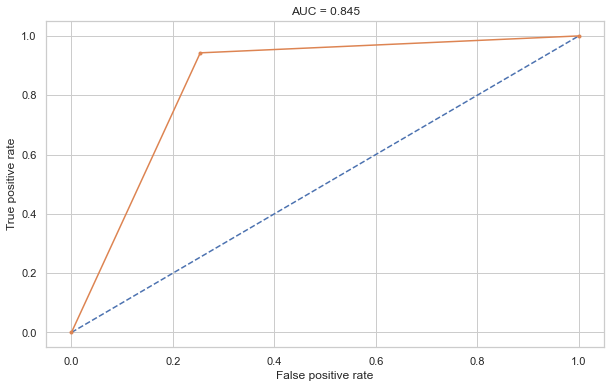

In [92]:
# ROC curve and AUC 
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()


### 5.4.3 Decision Trees

In [93]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [94]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [95]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_

{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}

In [96]:
# predictions
tree_predict = tree_clf.predict(X_test)

In [97]:
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 72.6%


In [98]:
cm=confusion_matrix(y_test,tree_predict)
cm

array([[518, 191],
       [152, 391]], dtype=int64)

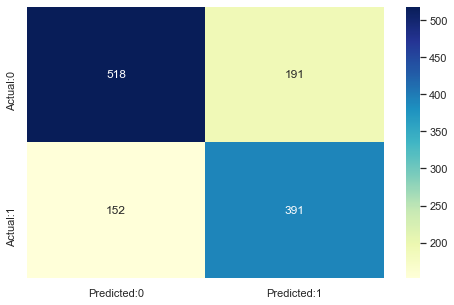

In [99]:
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [100]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       709
           1       0.67      0.72      0.70       543

    accuracy                           0.73      1252
   macro avg       0.72      0.73      0.72      1252
weighted avg       0.73      0.73      0.73      1252



In [101]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 69.51%


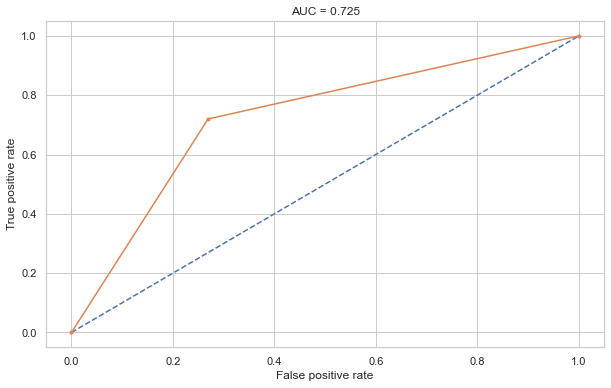

In [102]:
# ROC curve and AUC 
probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
tree_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

### 5.4.4 Support Vector Machine

In [103]:
from sklearn.svm import SVC

In [104]:
#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [105]:
# train the model
svm_clf.fit(X_train,y_train)
svm_clf.best_params_

{'C': 10, 'gamma': 1}

In [106]:
# predictions
svm_predict = svm_clf.predict(X_test)

In [107]:
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

Using SVM we get an accuracy of 84.58%


In [108]:
cm=confusion_matrix(y_test,svm_predict)
cm

array([[575, 134],
       [ 59, 484]], dtype=int64)

<AxesSubplot:>

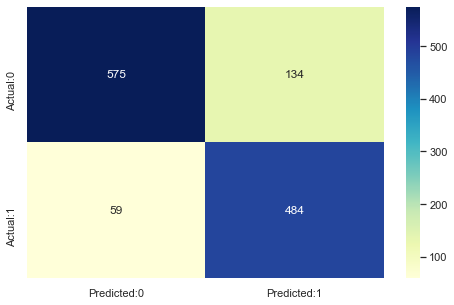

In [109]:
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [110]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       709
           1       0.78      0.89      0.83       543

    accuracy                           0.85      1252
   macro avg       0.85      0.85      0.85      1252
weighted avg       0.85      0.85      0.85      1252



In [111]:
svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 83.38%


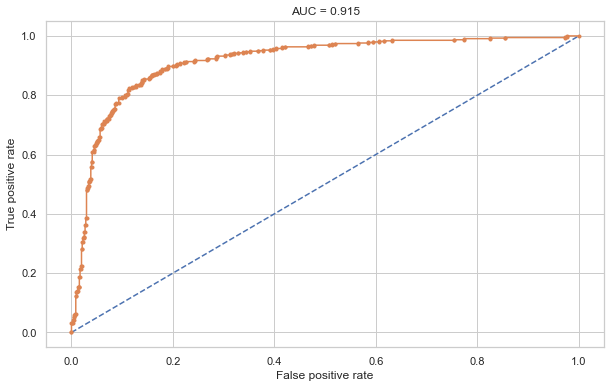

In [112]:
# ROC curve and AUC 
probs = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()

### 5.5 Model Comparison

In [113]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'AUC':log_auc, 'F1 score':logistic_f1},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy, 'AUC':tree_auc, 'F1 score':tree_f1},
    "Support vector machine":{'Accuracy':svm_accuracy, 'AUC':svm_auc, 'F1 score':svm_f1}
}).T

In [114]:
comparison

,Accuracy,AUC,F1 score
Logistic regression,0.650160,0.708756,0.619130
K-nearest neighbours,0.831470,0.844516,0.829150
Decision trees,0.726038,0.725340,0.695111
Support vector machine,0.845847,0.914943,0.833764


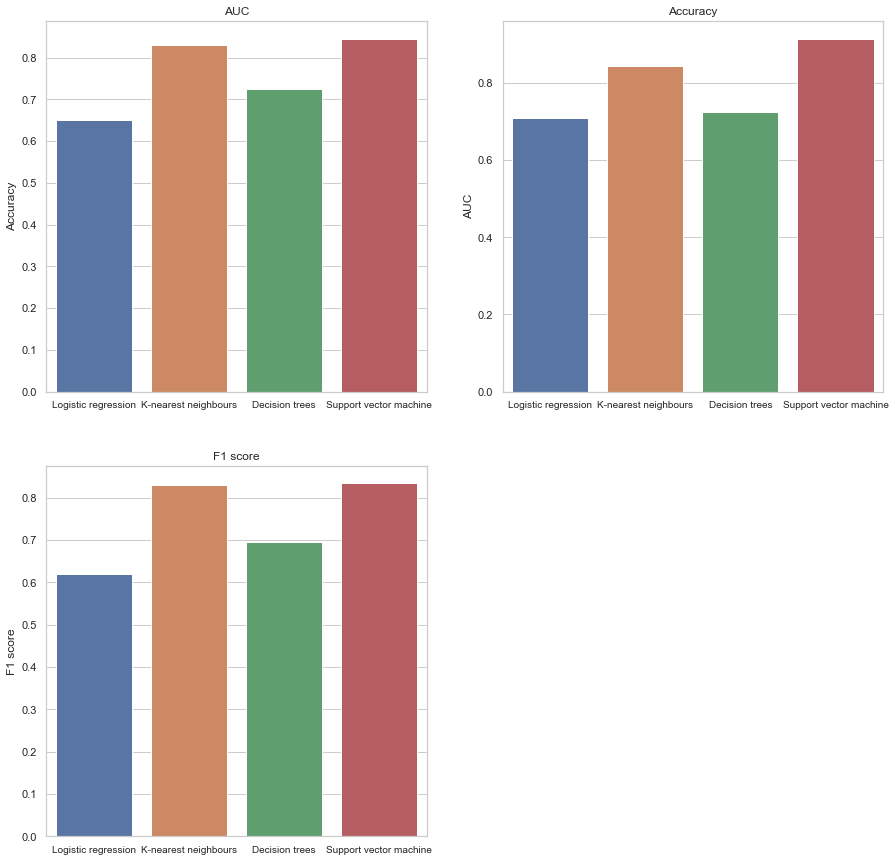

In [115]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['AUC','Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()

## Conclusion
- The most important features in predicting the ten year risk of developing CHD were age and systolic blood pressure
- The Support vector machine with the radial kernel was the best performing model in terms of accuracy and the F1 score. Its high AUC and this shows that it has a high true positive rate.
- Balancing the dataset by using the smote technique helped in improving the models sensitivity
- With more data(especially that of the minority class) better models can be built